# Tesla Charger Locations

![image of tesla superchargers](images/tesla-supercharger.png)

The primary data for this notebook comes from Tesla itself. On their website, is the entire dataset of chargers. It is a json file that contains information on all chargers in the world. It includes Superchargers and destination chargers. It has information on current and future expansion.

[Download Tesla All Locations](https://www.tesla.com/all-locations)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# get json tesla data
chargers = pd.read_json('input/tesla-chargers-2021-02-17.json')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(f"Columns List: {chargers.columns}")
print(chargers.shape)

Columns List: Index(['address_line_1', 'address_line_2', 'address_notes', 'address',
       'amenities', 'baidu_lat', 'baidu_lng', 'chargers', 'city',
       'common_name', 'country', 'destination_charger_logo',
       'destination_website', 'directions_link', 'emails', 'geocode', 'hours',
       'is_gallery', 'kiosk_pin_x', 'kiosk_pin_y', 'kiosk_zoom_pin_x',
       'kiosk_zoom_pin_y', 'latitude', 'location_id', 'location_type',
       'longitude', 'nid', 'open_soon', 'path', 'postal_code',
       'province_state', 'region', 'sales_phone', 'sales_representative',
       'sub_region', 'title', 'trt_id'],
      dtype='object')
(16512, 37)


In [3]:
# General Setting

tesla_red = '#e82127'

In [4]:
# just USA chargers
#q = "country == 'United States' & province_state == 'KY' & location_type.str.contains('supercharger', regex=False)"
q = "country == 'United States' & location_type.str.contains('supercharger', regex = False)" 
us_chargers = chargers.query(q)

us_chargers = us_chargers[['title', 'location_id', 'nid', 
                           'address_line_1', 'city', 'province_state', 'postal_code',
                           'chargers', 'common_name', 'open_soon',
                           'latitude', 'longitude', 'location_type']]

# rename
us_chargers.rename(columns = {"province_state": "state_code", "postal_code": "zip_code", "address_line_1" : "address"}, inplace = True)

print(us_chargers.shape)
us_chargers.head()

(1352, 13)


,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type
2,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]"
3,"Albert Lea, MN Supercharger",albertleasupercharger,6294,811 E Plaza St,Albert Lea,MN,56007,<p><strong>Charging</strong><br />4 Supercharg...,AmericInn Lodge & Suites Albert Lea,0,43.686060,-93.357721,"[supercharger, standard charger]"
4,"Angola, IN Supercharger",angolasupercharger,6298,3855 Indiana 127,Angola,IN,46703,<p><strong>Charging</strong><br />6 Supercharg...,Ramada Angola,0,41.699048,-85.000326,"[supercharger, standard charger]"
6,"Atascadero, CA Supercharger",atascaderosupercharger,6300,6950 El Camino Real,Atascadero,CA,93422,<p><strong>Charging</strong><br />8 Supercharg...,Rabobank,0,35.486585,-120.666378,"[supercharger, standard charger]"
11,"Beaver, UT Supercharger",beaversupercharger,6308,Littlefield Interchange,Beaver,UT,84713,<p><strong>Charging</strong><br/>8 Supercharge...,Beaver Valley Chevron,0,38.249149,-112.652524,"[supercharger, standard charger]"


# Extract data from the chargers HTML

I need to extract some data from a html field in the chargers column. Specifically I need to extract the number of chargers per station and the power rating (150KW, 250KW)

In [5]:
# add the number of chargers from the html, using regular expresions, this is searching
# for at least 1 digit (0-9) folowed by a space and the word 'Superchargers'. The () around
# the \d+ is a capture group. It will find the pattern but only return the part in the ()
us_chargers['num_of_chargers'] = us_chargers['chargers'].str.extract(r'(\d+) Superchargers', flags = re.IGNORECASE)

# add the power rate from the html
us_chargers['power'] = us_chargers['chargers'].str.extract(r'(\d+)KW', flags = re.IGNORECASE)
us_chargers.head()

# I need to figure out if it assigned a value to each. It may have 
# not matched some of the data. For example there was Supercharger and supercharger (lower case)
# I can open in excel, but I would rather do it here to learn

,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power
2,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6,150
3,"Albert Lea, MN Supercharger",albertleasupercharger,6294,811 E Plaza St,Albert Lea,MN,56007,<p><strong>Charging</strong><br />4 Supercharg...,AmericInn Lodge & Suites Albert Lea,0,43.686060,-93.357721,"[supercharger, standard charger]",4,150
4,"Angola, IN Supercharger",angolasupercharger,6298,3855 Indiana 127,Angola,IN,46703,<p><strong>Charging</strong><br />6 Supercharg...,Ramada Angola,0,41.699048,-85.000326,"[supercharger, standard charger]",6,150
6,"Atascadero, CA Supercharger",atascaderosupercharger,6300,6950 El Camino Real,Atascadero,CA,93422,<p><strong>Charging</strong><br />8 Supercharg...,Rabobank,0,35.486585,-120.666378,"[supercharger, standard charger]",8,150
11,"Beaver, UT Supercharger",beaversupercharger,6308,Littlefield Interchange,Beaver,UT,84713,<p><strong>Charging</strong><br/>8 Supercharge...,Beaver Valley Chevron,0,38.249149,-112.652524,"[supercharger, standard charger]",8,150


In [6]:
# get the location_id, open date from the supercharge.info to merge with the base tesla data

open_info = pd.read_json('input/supercharge-info.json')
open_info = open_info[['id', 'locationId', 'dateOpened']]

# rename
open_info.rename(columns = {"locationId": "location_id", "dateOpened": "date_opened"}, inplace = True)

print(open_info.shape)
open_info.head()

(2550, 3)


,id,location_id,date_opened
0,2215,dangjinsupercharger,2019-12-20
1,2216,seoulgangseosupercharger,2019-12-20
2,122,sanjuancapistranosupercharger,2014-05-06
3,125,glenwoodspringssupercharger,2013-09-17
4,126,grandjunctionsupercharger,2014-01-10


In [7]:
# merge the two dataset to add open date to the data
us_chargers = pd.merge(us_chargers, open_info, how = 'left', on = 'location_id')

us_chargers.info()
us_chargers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1353 entries, 0 to 1352
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1353 non-null   object 
 1   location_id      1353 non-null   object 
 2   nid              1353 non-null   int64  
 3   address          1353 non-null   object 
 4   city             1353 non-null   object 
 5   state_code       1346 non-null   object 
 6   zip_code         1353 non-null   object 
 7   chargers         1353 non-null   object 
 8   common_name      1353 non-null   object 
 9   open_soon        1353 non-null   int64  
 10  latitude         1353 non-null   float64
 11  longitude        1353 non-null   float64
 12  location_type    1353 non-null   object 
 13  num_of_chargers  978 non-null    object 
 14  power            977 non-null    object 
 15  id               1039 non-null   float64
 16  date_opened      973 non-null    object 
dtypes: float64(3),

,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power,id,date_opened
0,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6,150,160.0,2014-04-30
1,"Albert Lea, MN Supercharger",albertleasupercharger,6294,811 E Plaza St,Albert Lea,MN,56007,<p><strong>Charging</strong><br />4 Supercharg...,AmericInn Lodge & Suites Albert Lea,0,43.686060,-93.357721,"[supercharger, standard charger]",4,150,152.0,2014-01-15
2,"Angola, IN Supercharger",angolasupercharger,6298,3855 Indiana 127,Angola,IN,46703,<p><strong>Charging</strong><br />6 Supercharg...,Ramada Angola,0,41.699048,-85.000326,"[supercharger, standard charger]",6,150,147.0,2013-12-09
3,"Atascadero, CA Supercharger",atascaderosupercharger,6300,6950 El Camino Real,Atascadero,CA,93422,<p><strong>Charging</strong><br />8 Supercharg...,Rabobank,0,35.486585,-120.666378,"[supercharger, standard charger]",8,150,108.0,2013-07-03
4,"Beaver, UT Supercharger",beaversupercharger,6308,Littlefield Interchange,Beaver,UT,84713,<p><strong>Charging</strong><br/>8 Supercharge...,Beaver Valley Chevron,0,38.249149,-112.652524,"[supercharger, standard charger]",8,150,187.0,2014-04-14


In [8]:
# Add State Fullname 

# read the csv into a dict for use in replace map
state_codes = pd.read_csv('input/us_state_codes.csv')
state_codes.head()

us_chargers = pd.merge(us_chargers, state_codes, how = 'inner', on = 'state_code')
us_chargers.head()

,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power,id,date_opened,state_name
0,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6,150,160.0,2014-04-30,New York
1,"JFK - Queens, NY Supercharger",jfksupercharger,6407,150th Ave and 147th St,Queens,NY,11430,<p><strong>Charging</strong><br />4 Supercharg...,JFK Airport Travel Plaza,0,40.663190,-73.793192,"[supercharger, standard charger]",4,150,161.0,2013-12-23,New York
2,Utica Supercharger,uticanysupercharger,7654,50 Auert Ave.,Utica,NY,13501,<p><strong>Charging</strong><br />8 supercharg...,North Utica Shopping Center,0,43.113878,-75.206857,"[supercharger, standard charger]",8,150,545.0,2015-02-11,New York
3,Syracuse Supercharger,syracusesupercharger,9018,441 Electronics Parkway,Liverpool,NY,13088,<p><strong>Charging</strong><br />8 supercharg...,Holiday Inn Syracuse/Liverpool,0,43.102424,-76.187446,"[supercharger, standard charger]",8,150,547.0,2015-04-16,New York
4,Buffalo Supercharger,buffalosupercharger,9563,4455 Transit Road,Buffalo,NY,14221,<p><strong>Charging</strong><br />8 supercharg...,Shops at Main / Transit,0,42.968675,-78.695680,"[supercharger, standard charger]",8,150,415.0,2015-06-11,New York


In [9]:
# source
# https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html#par_textimage_500989927

# add state population
state_info = pd.read_csv('input/state_population.csv')

us_chargers = pd.merge(us_chargers, state_info, how = 'inner', on = 'state_name')
us_chargers.head()

,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power,id,date_opened,state_name,population_2019
0,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6,150,160.0,2014-04-30,New York,19453561
1,"JFK - Queens, NY Supercharger",jfksupercharger,6407,150th Ave and 147th St,Queens,NY,11430,<p><strong>Charging</strong><br />4 Supercharg...,JFK Airport Travel Plaza,0,40.663190,-73.793192,"[supercharger, standard charger]",4,150,161.0,2013-12-23,New York,19453561
2,Utica Supercharger,uticanysupercharger,7654,50 Auert Ave.,Utica,NY,13501,<p><strong>Charging</strong><br />8 supercharg...,North Utica Shopping Center,0,43.113878,-75.206857,"[supercharger, standard charger]",8,150,545.0,2015-02-11,New York,19453561
3,Syracuse Supercharger,syracusesupercharger,9018,441 Electronics Parkway,Liverpool,NY,13088,<p><strong>Charging</strong><br />8 supercharg...,Holiday Inn Syracuse/Liverpool,0,43.102424,-76.187446,"[supercharger, standard charger]",8,150,547.0,2015-04-16,New York,19453561
4,Buffalo Supercharger,buffalosupercharger,9563,4455 Transit Road,Buffalo,NY,14221,<p><strong>Charging</strong><br />8 supercharg...,Shops at Main / Transit,0,42.968675,-78.695680,"[supercharger, standard charger]",8,150,415.0,2015-06-11,New York,19453561


# Bar Charts

In [10]:
# Number of Chargers by State

# Only get open chargers, I need to check this. It says there 
# are 100 chargers opening in CA this year, that is a lot
q = 'open_soon == 0'
open_us_chargers = us_chargers.query(q)

# get the top ten
top_ten = open_us_chargers['state_name'].value_counts()[:10]
top_ten

California      202
Florida          56
New York         48
Texas            47
New Jersey       31
Virginia         30
Washington       29
Pennsylvania     26
Illinois         25
Colorado         25
Name: state_name, dtype: int64

In [11]:
%matplotlib inline

def bar_chart(x, y, x_label, y_label, title):

    # make a bar chart
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, zorder=10)
    ax.bar(x, y, color=tesla_red)

    # text
    ax.set_title(title, fontsize = 18)
    ax.set_xlabel(x_label, fontsize = 8, fontweight = 'bold')
    ax.set_xticklabels(x, rotation=45)

    ax.set_ylabel(y_label, fontsize = 8, fontweight = 'bold')
    ax.legend(['Count'])

    # totally ripped off, i need to better understand what is happening 
    for i in range(len(y)):
        ax.annotate(str(y[i]), xy=(x[i],y[i] -11), ha='center', va='bottom', color='white')

    # grids on
    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)
    ax.grid(color = 'gray', linestyle = 'solid', alpha = 0.2)

    plt.show()

['California', 'Florida', 'New York', 'Texas', 'New Jersey', 'Virginia', 'Washington', 'Pennsylvania', 'Illinois', 'Colorado']


<ipython-input-11-45f49cb8ec65>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45)


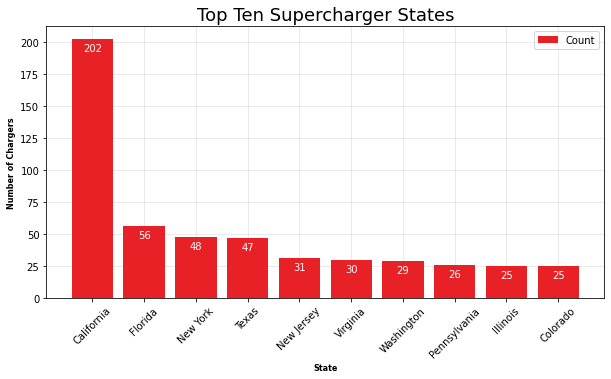

In [12]:
# bar by state
state_name = top_ten.index.values.tolist() 
charger_count = top_ten.values.tolist()
print(state_name)
bar_chart(state_name, charger_count, 'State', 'Number of Chargers', 'Top Ten Supercharger States')

       state_name  site_count  population_2019   pop_per_site
48        Wyoming          10           578759   57875.900000
24        Montana          13          1068778   82213.692308
39   South Dakota           8           884659  110582.375000
17          Maine          11          1344212  122201.090909
26         Nevada          20          3080156  154007.800000
43        Vermont           4           623989  155997.250000
5     Connecticut          22          3565287  162058.500000
6        Delaware           6           973764  162294.000000
32   North Dakota           4           762062  190515.500000
27  New Hampshire           7          1359711  194244.428571


<ipython-input-11-45f49cb8ec65>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45)


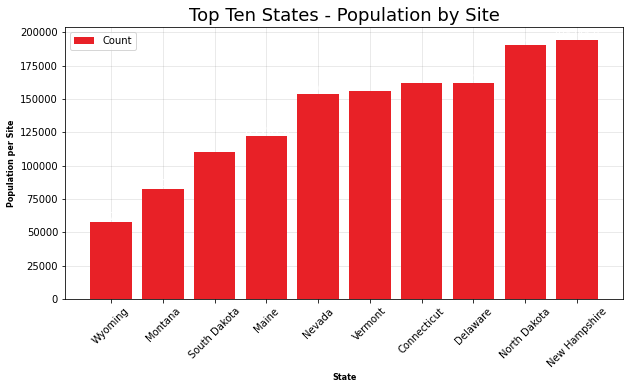

In [13]:
# poplulation

pop = open_us_chargers.groupby(['state_name'], as_index = False).population_2019.count()
pop = pop.rename(columns={'population_2019':'site_count'})
pop = pd.merge(pop, state_info, how = 'inner', on = 'state_name')
pop['pop_per_site'] = pop['population_2019'] / pop['site_count'] 
pop = pop.sort_values(by=['pop_per_site'], ascending = True)
pop = pop.head(10)
state_list = pop['state_name'].values.tolist() 
pop_per_site = pop['pop_per_site'].round().values.tolist()
print(pop)
bar_chart(state_list, pop_per_site, 'State', 'Population per Site', 'Top Ten States - Population by Site')

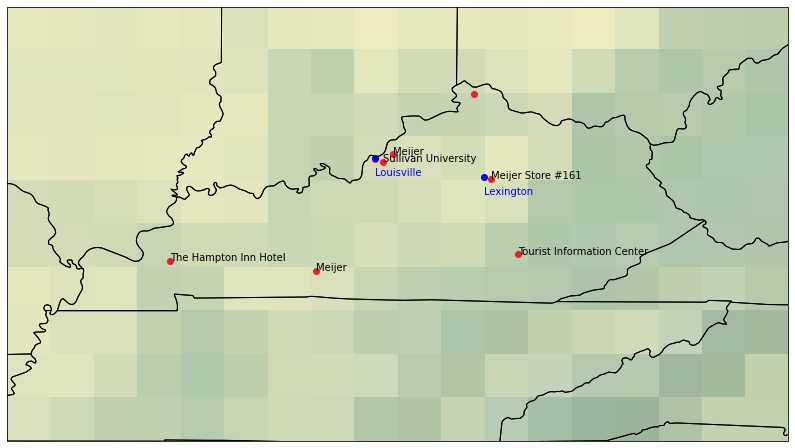

In [15]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#import cartopy.io.shapereader as shpreader
#import cartopy.io.img_tiles as cimgt
#import cartopy.mpl.geoaxes
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#%matplotlib inline

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.stock_img() # pretty map
ax.coastlines()
ax.add_feature(cfeature.STATES)

# map extents
extent = [-135, -66.5, 20, 55] # United States
extent = [-90, -81, 35, 40] # Kentucky
ax.set_extent(extent, crs=ccrs.PlateCarree()) ## Important

# get ky chargers only
ky_chargers = us_chargers[us_chargers.state_code == "KY"]
# add chargers
plt.scatter(ky_chargers.longitude, ky_chargers.latitude, color=tesla_red, alpha=1, transform=ccrs.PlateCarree())

for index, row in ky_chargers.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    name = row['common_name']
    ax.text(lon, lat, name, transform=ccrs.PlateCarree())

# Add some cities in the area
plt.scatter(-85.7585, 38.2527, color='blue', alpha=1, transform=ccrs.PlateCarree())
ax.text(-85.7585, 38.2527 - 0.2, 'Louisville', color='blue', transform=ccrs.PlateCarree())

plt.scatter(-84.5037, 38.0406 , color='blue', alpha=1, transform=ccrs.PlateCarree())
ax.text(-84.5037, 38.0406 - 0.2, 'Lexington', color='blue', transform=ccrs.PlateCarree())

plt.show()

## Create a requirements.txt file

```
pip list --format=freeze > requirements.txt
```

# Next Steps
* Maps
* Heat map of charger locations
  * You can heat map the count, but it might be interesting to heat map the power levels counts
  * This could be a figure that has multiple subplots
  * color the lower counts red and the higher population blue. Can I even do this
* Number of chargers open by month
  * Can I combine this with number of cars produced by month. I think they release these numbers as part of their quarterly financial statement.
* Compare population of state to number of superchargers to normalize. Hint California is still way over
* Pratik showed a box plot
* Compared to sales by state if available
* Animation of the chargers by open date. 
  * plt.annotate could show all the dates as the plot refreshes
* Pratik suggested to categorize the populations like < 1 million, 2-4, 5-10, 10+
* Also try to get the requirements.txt file generated.
* Other visualization Tools
  * Seaborn
  * dash (dashboard tool)
  * plotly
* Can I aggragate the count of chargers with the average of state population
  * In SQL it woudl be statename, count(*), avg(population)... group by statename

# Notes
* Check for outliers (don't throw it out if it is valid)
* When doing correlations just pick the data that you think will have correlation
* ax, plt what is this. He said that ax is the axis
* Discrete vs Continuous Data
* make a notebook of often used pandas
  * make functions ( how can I include this in a single import)i
* Dates can maybe be converted to something meaningful by saying the number of days since the event


In [12]:
us_chargers.info()
us_chargers.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 0 to 1320
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1321 non-null   object 
 1   location_id      1321 non-null   object 
 2   nid              1321 non-null   int64  
 3   address          1321 non-null   object 
 4   city             1321 non-null   object 
 5   state_code       1321 non-null   object 
 6   zip_code         1321 non-null   object 
 7   chargers         1321 non-null   object 
 8   common_name      1321 non-null   object 
 9   open_soon        1321 non-null   int64  
 10  latitude         1321 non-null   float64
 11  longitude        1321 non-null   float64
 12  location_type    1321 non-null   object 
 13  num_of_chargers  950 non-null    object 
 14  power            949 non-null    object 
 15  id               1010 non-null   float64
 16  date_opened      944 non-null    object 
 17  state_name    

,nid,open_soon,latitude,longitude,id
count,1321.000000,1321.000000,1321.000000,1321.000000,1010.000000
mean,37430.137017,0.279334,38.100052,-96.072477,1429.733663
std,17429.495261,0.448842,4.987450,18.748207,776.824740
min,6293.000000,0.000000,20.888030,-157.860336,100.000000
25%,28527.000000,0.000000,34.327530,-117.515537,760.500000
50%,34706.000000,0.000000,38.782160,-91.188428,1530.500000
75%,55708.000000,1.000000,41.348503,-78.925179,2096.500000
max,56196.000000,1.000000,60.487024,-67.348038,2767.000000
